In [5]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pymysql as mql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

db = mql.connect("localhost", "root", "ab123456", "INFO7390_Time")

In [7]:
df1 = pd.read_sql_query("select * from weather_all_station;", db)
df1.head()

,Station,County,Avg_temp,h_temp/ Day,low_temp/ Day,Rain,rela_hum,small_hum/ Day,pressure,rain_day,sun_hr,Year,Month
0,Alishan,Chiayi County,8.7,17.6/11,-0.3/5,103.2,89,31/10,765.8,9,118.0,2008,1
1,Anbu,Taipei City,10.9,24.1/11,2.5/2,352.0,92,55/20,925.7,21,35.6,2008,1
2,Banqiao,New Taipei City,16.6,29.1/11,9.3/2,81.0,80,45/20,1019.2,13,65.4,2008,1
3,Zhongli,Taitung County,19.6,27.6/12,12.6/1,43.8,77,54/3,1014.9,18,27.8,2008,1
4,Chiayi,Chiayi City,17.6,31.3/11,6.9/3,31.2,79,41/6,1015.1,7,135.5,2008,1


In [8]:
import os.path
userhome = os.path.expanduser('~')
csvfile2 = os.path.join(userhome, 'Desktop', '2017spring', 'MyJava', 'final_dengue', 'output', 'part-r-00000')
df2 = pd.read_csv(csvfile2,header=None)
df2.columns = ['Year','Month','County','total_case','Level']
df2.head()

,Year,Month,County,total_case,Level
0,1998,1,Kaohsiung City,1,0
1,1998,1,New Taipei City,1,0
2,1998,1,Pingtung County,2,0
3,1998,1,Taipei City,1,0
4,1998,1,Taoyuan City,1,0


In [9]:
df3 = pd.merge(df1, df2, on=['Year', 'Month','County'])
df3.head()

,Station,County,Avg_temp,h_temp/ Day,low_temp/ Day,Rain,rela_hum,small_hum/ Day,pressure,rain_day,sun_hr,Year,Month,total_case,Level
0,Anbu,Taipei City,10.9,24.1/11,2.5/2,352.0,92,55/20,925.7,21,35.6,2008,1,3,0
1,Taipei,Taipei City,16.5,28.8/11,10.2/2,85.8,81,44/20,1020.3,15,61.2,2008,1,3,0
2,Zhuzihu,Taipei City,12.6,25.6/11,4.6/2,313.0,88,53/9,949.6,20,70.3,2008,1,3,0
3,Banqiao,New Taipei City,16.6,29.1/11,9.3/2,81.0,80,45/20,1019.2,13,65.4,2008,1,1,0
4,Tamsui,New Taipei City,15.6,25.1/9,8.6/2,107.5,79,48/9,1018.5,14,57.2,2008,1,1,0


In [10]:
#all
df3.isnull().any()

Station            False
County             False
Avg_temp           False
h_temp/\nDay       False
low_temp/\nDay     False
Rain               False
rela_hum           False
small_hum/\nDay    False
pressure           False
rain_day           False
sun_hr             False
Year               False
Month              False
total_case         False
Level              False
dtype: bool

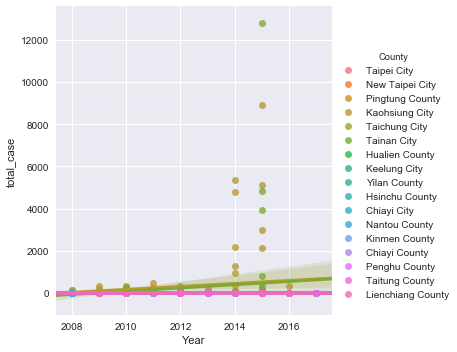

In [11]:
#先開始檢測線性關係
sns.lmplot(x = 'Year', y='total_case', hue="County", data = df3)
plt.show()

In [12]:
#先檢測全部欄位的影響情況
X = np.array(df3[['Avg_temp','Rain','rela_hum','pressure','rain_day','sun_hr']])
y = np.array(df3['total_case'])
model1 = linear_model.LinearRegression()
results = model1.fit(X, y)
print (results.intercept_, results.coef_)

527.638645855 [ 11.28733029  -0.0549384   -1.50148727  -0.39708767  -6.35364045
  -0.93637625]


In [13]:
# Create linear regression object
linreg0 = LinearRegression()

# Train the model using the training sets
linreg0.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
from sklearn import metrics
# Compute RMSE on all data
y_pred = linreg0.predict(X)
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
rmse

510.28378484073551

In [15]:
model2 = sm.OLS(y, X)
results = model2.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.773
Date:                Wed, 13 Dec 2017   Prob (F-statistic):           0.000984
Time:                        18:32:27   Log-Likelihood:                -11084.
No. Observations:                1448   AIC:                         2.218e+04
Df Residuals:                    1442   BIC:                         2.221e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.8805      3.705      2.127      0.034       0.613      15.148
x2            -0.0492      0.075     -0.658      0.511      -0.196       0.097
x3             1.2028      1.989      0.605      0.545      -2.698       5.104
x4            -0.0573      0.175     -0.327      0.744      -0.401       0.286
x5            -5.6431      3.523     -1.602      0.109     -12.554       1.267
x6            -0.6023      0.325     -1.855      0.064      -1.239       0.035
==============================================================================
Omnibus:                     3029.281   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7501841.485
Skew:                          17.241   Prob(JB):                         0.00
Kurtosis:                     353.929   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
from sklearn import preprocessing
X = np.array(df3[['Avg_temp','Rain','rela_hum','pressure','rain_day','sun_hr']])
# calculate mean  
X_mean = X.mean(axis=0)  
# calculate variance   
X_std = X.std(axis=0)  
# standardize X  
X1 = (X-X_mean)/X_std  # 自己计算
# use function preprocessing.scale to standardize X  
X_scale = preprocessing.scale(X)  # 调用sklearn包的方法
Y = np.array(df3['total_case'])
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.3, random_state=0)
X_train.shape,y_train.shape

((1013, 6), (1013,))

In [17]:
model = LinearRegression()  
results=model.fit(X_train, y_train)  
print (results)  
print (results.intercept_)  
print (results.coef_) 



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
61.5239392628
[ 96.64692285 -22.97492487  -9.22768002 -44.60437315 -48.98483911
 -81.15052442]


In [18]:
# Create linear regression object
linreg2 = LinearRegression()

# Train the model using the training sets
linreg2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# Compute RMSE on all data
y_pred = linreg2.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

265.04227190444971

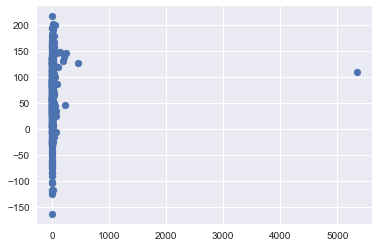

In [20]:
plt.scatter(y_test, y_pred)

In [21]:
np.median(y_test)

3.0

In [22]:
y_m=np.mean(y_test)
rmse/y_m

11.999728172193549

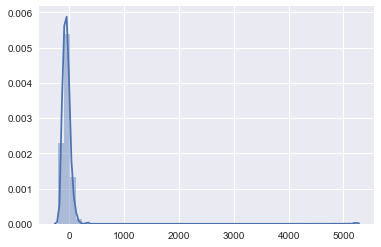

In [23]:
sns.distplot(y_test - y_pred)

In [24]:
model2 = sm.OLS(y_train, X_train)
results = model2.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.742
Date:                Wed, 13 Dec 2017   Prob (F-statistic):              0.108
Time:                        18:32:27   Log-Likelihood:                -7898.0
No. Observations:                1013   AIC:                         1.581e+04
Df Residuals:                    1007   BIC:                         1.584e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            94.3223     36.426      2.589      0.010      22.842     165.802
x2           -22.6237     26.223     -0.863      0.388     -74.082      28.835
x3           -10.6625     23.298     -0.458      0.647     -56.380      35.055
x4           -44.8628     29.693     -1.511      0.131    -103.131      13.405
x5           -47.4622     29.689     -1.599      0.110    -105.722      10.797
x6           -80.4708     34.926     -2.304      0.021    -149.007     -11.935
==============================================================================
Omnibus:                     2035.920   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3335037.919
Skew:                          15.446   Prob(JB):                         0.00
Kurtosis:                     282.391   Cond. No.                         4.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

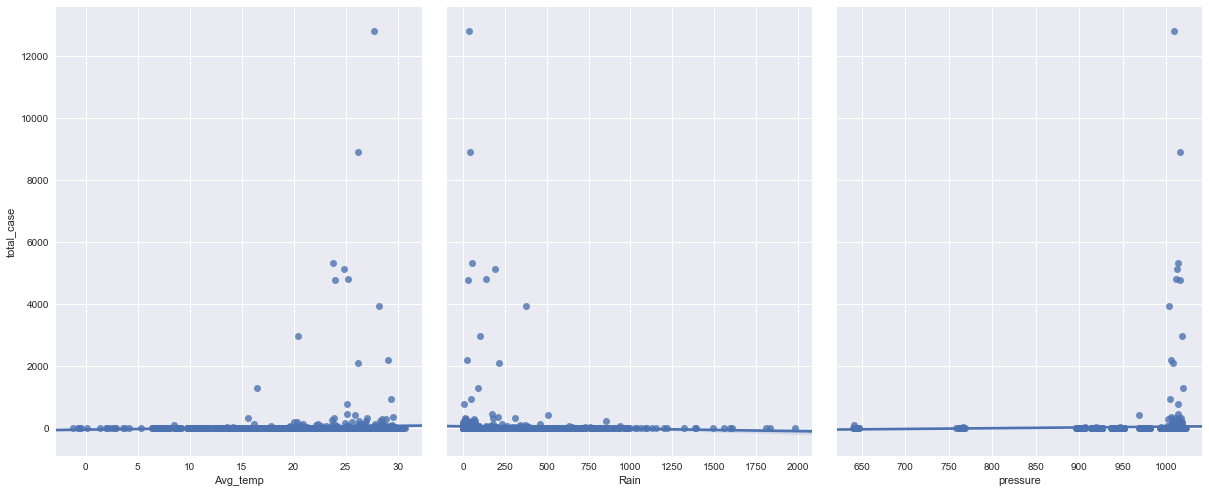

In [25]:
sns.pairplot(df3, x_vars=['Avg_temp','Rain','pressure'], y_vars='total_case', size=7, aspect=0.8, kind='reg')  
plt.show()

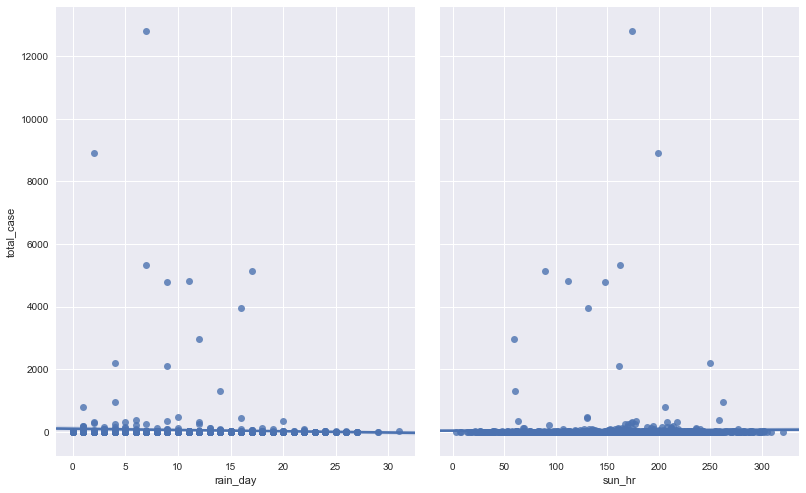

In [26]:
sns.pairplot(df3, x_vars=['rain_day','sun_hr'], y_vars='total_case', size=7, aspect=0.8, kind='reg')  
plt.show()

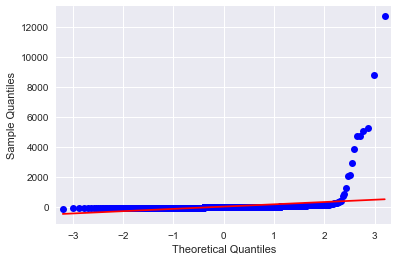

In [27]:
## Q-Q plot for normality
# 使用這個圖去看是否符合我們誤差為0的情況下的相關性
weather_model = ols("total_case ~ Avg_temp + Rain + pressure + rain_day + sun_hr -1", data=df3).fit()
fig1=sm.qqplot(weather_model.resid, line='r')
plt.show()

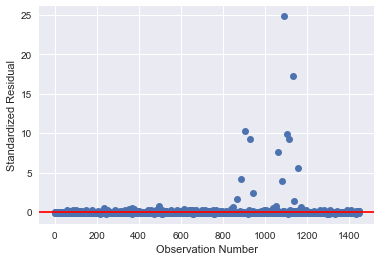

In [28]:
# simple plot of residuals

stdres=pd.DataFrame(weather_model.resid_pearson)
fig2 = plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
print (fig2)

Figure(432x288)


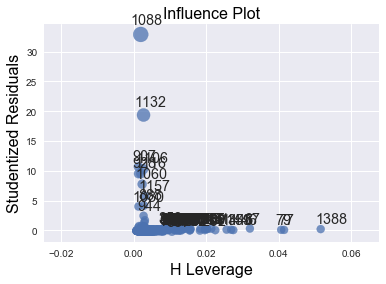

In [29]:
# leverage plot
# 這是看是否有極端的Ｘ值，從這個圖來看，顯然是分佈成一條線
fig5=sm.graphics.influence_plot(weather_model, size=15)
print(fig5)

In [30]:
df3.head()

,Station,County,Avg_temp,h_temp/ Day,low_temp/ Day,Rain,rela_hum,small_hum/ Day,pressure,rain_day,sun_hr,Year,Month,total_case,Level
0,Anbu,Taipei City,10.9,24.1/11,2.5/2,352.0,92,55/20,925.7,21,35.6,2008,1,3,0
1,Taipei,Taipei City,16.5,28.8/11,10.2/2,85.8,81,44/20,1020.3,15,61.2,2008,1,3,0
2,Zhuzihu,Taipei City,12.6,25.6/11,4.6/2,313.0,88,53/9,949.6,20,70.3,2008,1,3,0
3,Banqiao,New Taipei City,16.6,29.1/11,9.3/2,81.0,80,45/20,1019.2,13,65.4,2008,1,1,0
4,Tamsui,New Taipei City,15.6,25.1/9,8.6/2,107.5,79,48/9,1018.5,14,57.2,2008,1,1,0


In [31]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

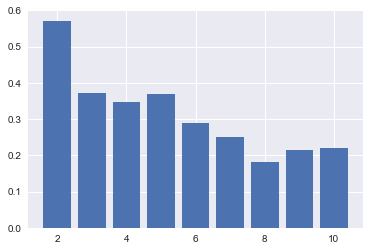

[0.57137120790655704, 0.37189455104367652, 0.34763828727558654, 0.36945536748338592, 0.28881719923933208, 0.24952233574921623, 0.18280000953537875, 0.21399035463157104, 0.22064354552149856]


In [32]:
# k-means
from sklearn.cluster import KMeans
from sklearn import cluster, datasets, metrics
X_km = df3[['Avg_temp', 'Rain', 'rela_hum', 'pressure', 'rain_day', 'sun_hr', 'total_case']].values
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(X_km, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [33]:
#k=2 have great situation, so cluster use 2           
estimator=KMeans(n_clusters=2) 
res=estimator.fit_predict(X_km)
lable_pred=estimator.labels_
centroids=estimator.cluster_centers_
inertia=estimator.inertia_
#print res
print (lable_pred)
print (centroids)
print (inertia)


[0 0 0 ..., 0 0 0]
[[   22.30582929   207.43976405    78.06523248   979.27848716    11.7925052
    148.18736988    16.97501735]
 [   25.7          122.34285714    74.85714286  1011.55714286
      9.85714286   144.84285714  6538.42857143]]
183332537.434


In [34]:
# from this consequence, we can find that heigher temp ,lower humity have heigher case

In [35]:
#開始檢測ＳＶＭ
df_train_target = df3['Level'].values
df_train_data = df3[['Avg_temp', 'Rain', 'rela_hum', 'pressure', 'rain_day', 'sun_hr']]
print( 'df_train_data shape is ', df_train_data.shape)
print( 'df_train_target shape is ', df_train_target.shape)

df_train_data shape is  (1448, 6)
df_train_target shape is  (1448,)


In [36]:
X = df_train_data
y = df_train_target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=0)

from sklearn.svm import SVC
model = SVC()

#使用Support Vector Classifier來建立模型
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
predictions = model.predict(X_test)

#載入classification_report & confusion_matrix來評估模型好壞
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[248   0   0]
 [ 36   0   0]
 [  6   0   0]]


             precision    recall  f1-score   support

          0       0.86      1.00      0.92       248
          1       0.00      0.00      0.00        36
          2       0.00      0.00      0.00         6

avg / total       0.73      0.86      0.79       290



In [38]:
from sklearn.model_selection import GridSearchCV

#GridSearchCV是建立一個dictionary來組合要測試的參數
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

#GridSearchCV算是一個meta-estimator，參數中帶有estimator，像是SVC，重點是會創造一個新的estimator，但又表現的一模一樣。也就是estimator=SVC時，就是作為分類器
#Verbose可設定為任一整數，它只是代表數字越高，文字解釋越多
grid = GridSearchCV(SVC(),param_grid,verbose=3)

#利用剛剛設定的參數來找到最適合的模型
grid.fit(X_train,y_train)

#顯示最佳參數組合
grid.best_params_

#顯示最佳estimator參數
grid.best_estimator_

#利用剛剛的最佳參數再重新預測測試組
grid_predictions = grid.predict(X_test)

#評估新參數的預測結果好壞
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................... C=0.1, gamma=1, score=0.875969, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................... C=0.1, gamma=1, score=0.878238, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................... C=0.1, gamma=1, score=0.877922, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................. C=0.1, gamma=0.1, score=0.875969, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................. C=0.1, gamma=0.1, score=0.878238, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.1, score=0.877922, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................ C=0.1, gamma=0.01, score=0.875969, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................ C=0.1, gamma=0.01, score=0.878238, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................ C=0.1, gamma=0.01, score=0.877922, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=0.001, score=0.875969, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=0.001, score=0.878238, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............... C=0.1, gamma=0.001, score=0.877922, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] .

[CV] ................ C=1000, gamma=0.1, score=0.877922, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ............... C=1000, gamma=0.01, score=0.852713, total=   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ............... C=1000, gamma=0.01, score=0.836788, total=   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ............... C=1000, gamma=0.01, score=0.851948, total=   0.1s
[CV] C=1000, gamma=0.001 .............................................
[CV] .............. C=1000, gamma=0.001, score=0.785530, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .............. C=1000, gamma=0.001, score=0.790155, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .............. C=1000, gamma=0.001, score=0.812987, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    4.3s finished


In [39]:
model.score(X_test, y_test)

0.85517241379310349

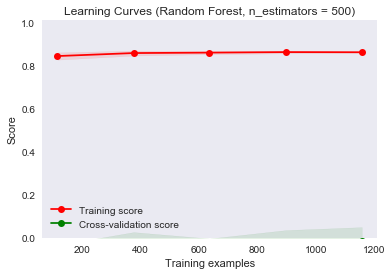

In [40]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Random Forest, n_estimators = 500)"
cv = cross_validation.ShuffleSplit(df_train_data.shape[0], n_iter=10,test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators = 500)
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

In [82]:
#use deep learning CNN
from keras.models import Sequential
from keras.layers import Dense
import numpy
seed = 7
numpy.random.seed(seed)

In [84]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=6, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))


In [85]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
# translate to 1 and 0 to look serious or not
df3['Level'].replace('2', '1', inplace=True)

In [87]:
# Fit the model
X = df3[['Avg_temp', 'Rain', 'rela_hum', 'pressure', 'rain_day', 'sun_hr']].values
y = df3['Level'].values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=0)
model.fit(X_train,y_train, epochs=150, batch_size=10)

Epoch 1/150
1158/1158 [==============================] - 0s - loss: 0.4683 - acc: 0.8774     
Epoch 2/150
1158/1158 [==============================] - 0s - loss: 0.4308 - acc: 0.8774     
Epoch 3/150
1158/1158 [==============================] - 0s - loss: 0.4306 - acc: 0.8774     
Epoch 4/150
1158/1158 [==============================] - 0s - loss: 0.4290 - acc: 0.8774     
Epoch 5/150
1158/1158 [==============================] - 0s - loss: 0.4318 - acc: 0.8774     
Epoch 6/150
1158/1158 [==============================] - 0s - loss: 0.4276 - acc: 0.8774     
Epoch 7/150
1158/1158 [==============================] - 0s - loss: 0.4267 - acc: 0.8774     
Epoch 8/150
1158/1158 [==============================] - 0s - loss: 0.4258 - acc: 0.8774     
Epoch 9/150
1158/1158 [==============================] - 0s - loss: 0.4272 - acc: 0.8774     
Epoch 10/150
1158/1158 [==============================] - 0s - loss: 0.4269 - acc: 0.8774     
Epoch 11/150
1158/1158 [==============================] - 0

1158/1158 [==============================] - 0s - loss: 0.4084 - acc: 0.8774     
Epoch 87/150
1158/1158 [==============================] - 0s - loss: 0.4080 - acc: 0.8774     
Epoch 88/150
1158/1158 [==============================] - 0s - loss: 0.4088 - acc: 0.8774     
Epoch 89/150
1158/1158 [==============================] - 0s - loss: 0.4085 - acc: 0.8774     
Epoch 90/150
1158/1158 [==============================] - 0s - loss: 0.4056 - acc: 0.8774     
Epoch 91/150
1158/1158 [==============================] - 0s - loss: 0.4036 - acc: 0.8774     
Epoch 92/150
1158/1158 [==============================] - 0s - loss: 0.4055 - acc: 0.8774     - ETA: 0s - loss: 0.4302 - acc: 0.
Epoch 93/150
1158/1158 [==============================] - 0s - loss: 0.4086 - acc: 0.8774     
Epoch 94/150
1158/1158 [==============================] - 0s - loss: 0.4062 - acc: 0.8774     
Epoch 95/150
1158/1158 [==============================] - 0s - loss: 0.4076 - acc: 0.8774     
Epoch 96/150
1158/1158 [=====

In [88]:
# calculate predictions, because i use the sigmoid 
predictions = model.predict(X_test)
# round predictions
rounded = [round(x) for x in predictions]
print(rounded)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,